In [251]:
import tensorflow as tf

In [252]:
import pandas as pd
import numpy as np

In [253]:
df_bon=pd.read_csv('true.csv')
df_mauvais=pd.read_csv('false.csv')
df_mitm=pd.read_csv('donnees_vols_valides_Rate.csv')
df_mitm=df_mitm.drop(columns=['snow','erreur_m','target_x','target_y','target_z'],axis=1)
df_mauvais=df_mauvais.drop(columns=['snow','erreur_m'],axis=1)
df_bon=df_bon.drop(columns=['erreur_m','snow'],axis=1)


In [254]:
df_mauvais['is_attack'] = df_mauvais["is_attack"].replace(1, 0)

In [255]:
df_mitm['is_attack'] = df_mitm["is_attack"].replace(1, 0)

In [256]:
df_merge = pd.concat([df_bon, df_mauvais,df_mitm], ignore_index=True)

In [257]:
df_merge.shape
df_merge.describe()


,mission_id,time,real_x,real_y,real_z,vx,vy,vz,ax,ay,...,roll,pitch,yaw,wind_x,wind_y,wind_z,velocity,rain,fog,is_attack
count,14763.000000,1.476300e+04,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,...,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000
mean,338.004267,1.660058e+09,18.255141,0.530589,-2.877110,0.293210,0.101049,0.139440,-0.058603,-0.504637,...,-0.011263,-0.024501,-0.171638,2.948753,1.923604,1.358679,12.521068,0.105919,0.108627,0.392603
std,310.059015,3.800015e+08,15.439048,3.475461,4.291379,2.205532,1.165419,0.619086,0.181904,2.144007,...,0.123615,0.525968,2.482382,0.339315,0.412904,5.194177,43.952202,0.063031,0.074061,0.488346
min,1.000000,-5.240803e+00,-12.084674,-14.119663,-36.765549,-9.472232,-6.753105,-3.540250,-7.257311,-11.851079,...,-0.772978,-3.131726,-3.141575,1.500462,0.400274,0.060624,0.089348,0.000000,0.000000,0.000000
25%,99.000000,1.745441e+09,4.039461,-1.000000,-5.000000,-0.225025,-0.209575,-0.026690,-0.086344,-0.065334,...,-0.062941,-0.027031,-2.760905,2.777819,1.771260,0.453322,4.760000,0.060000,0.051000,0.000000
50%,248.000000,1.747511e+09,16.006756,0.000000,-4.990730,0.285793,0.017191,0.018173,-0.034524,-0.019611,...,-0.000085,0.000010,-0.588664,2.980671,1.976061,0.505194,6.100000,0.100000,0.106000,0.000000
75%,506.000000,1.747771e+09,31.634746,2.523597,-1.714233,0.618171,0.446627,0.678755,0.012818,0.022720,...,0.006116,0.016920,2.660495,3.173305,2.174112,0.556939,7.990000,0.160000,0.157000,1.000000
max,1305.000000,1.747930e+09,70.000000,18.104100,19.517063,9.613590,6.377484,15.107558,0.372367,9.114528,...,0.827115,3.138979,3.498398,3.499988,2.499987,150.911467,711.678817,0.380000,0.492000,1.000000


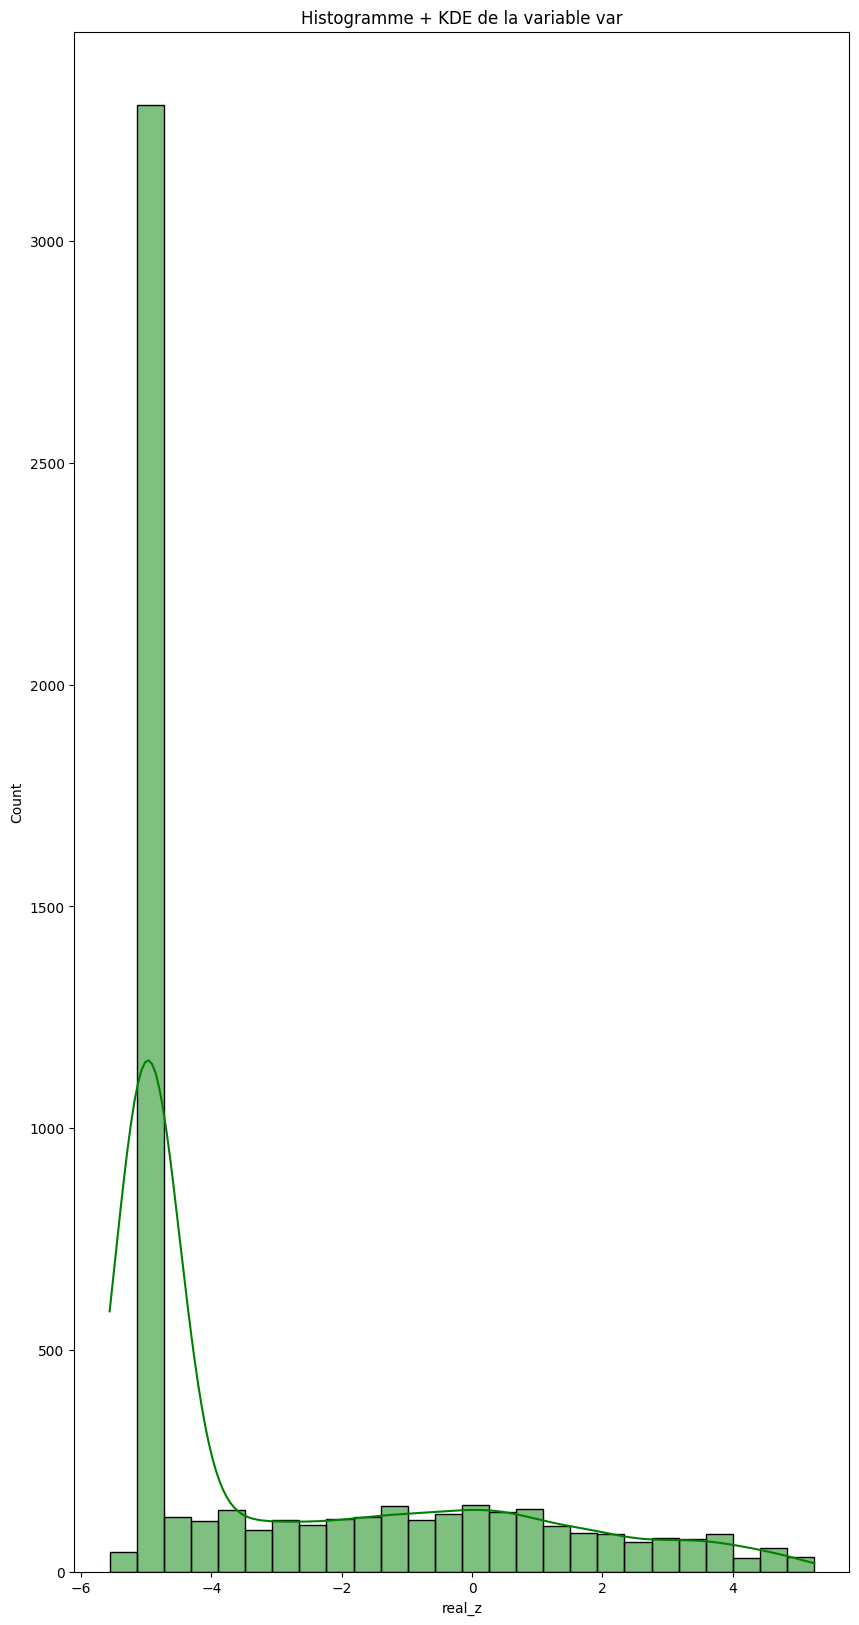

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,20))
sns.histplot(df_bon['real_z'], kde=True, color='green')
plt.title('Histogramme + KDE de la variable var')
plt.show()

In [259]:
seuil = 0
mediane = df_merge['vx'].median()

df_merge.loc[df_merge['vx'] ==seuil, 'vx'] = mediane

In [260]:
seuil = 0
mediane = df_merge['vy'].median()

df_merge.loc[df_merge['vy'] ==seuil, 'vy'] = mediane

In [261]:
seuil = 0
mediane = df_merge['vz'].median()

df_merge.loc[df_merge['vz'] ==seuil, 'vz'] = mediane

In [262]:
pourcentage = df_merge['is_attack'].value_counts(normalize=True) * 100
print(pourcentage)

is_attack
0.0    60.739687
1.0    39.260313
Name: proportion, dtype: float64


In [263]:
df_merge.shape

(14763, 21)

In [264]:
X=df_merge.drop(columns=['is_attack'],axis=1)
Y=df_merge['is_attack']

In [265]:
nan_percent = X.isna().mean() * 100
print(nan_percent)

mission_id    0.0
time          0.0
real_x        0.0
real_y        0.0
real_z        0.0
vx            0.0
vy            0.0
vz            0.0
ax            0.0
ay            0.0
az            0.0
roll          0.0
pitch         0.0
yaw           0.0
wind_x        0.0
wind_y        0.0
wind_z        0.0
velocity      0.0
rain          0.0
fog           0.0
dtype: float64


In [266]:
from sklearn.feature_selection import f_classif
import pandas as pd

 # binaire ou catégorielle

 #F, p = f_classif(X, Y)

#for i, col in enumerate(X.columns):
    #print(f"{col} → F-score : {F[i]:.2f}, p-value : {p[i]:.4f}")

In [267]:
from scipy.stats import pointbiserialr

for col in X.columns:
    corr, pval = pointbiserialr(X[col], Y)
    print(f"{col} → Corrélation point biserial : {corr:.4f}, p-value : {pval:.4f}")

mission_id → Corrélation point biserial : 0.3962, p-value : 0.0000
time → Corrélation point biserial : 0.1839, p-value : 0.0000
real_x → Corrélation point biserial : 0.0539, p-value : 0.0000
real_y → Corrélation point biserial : -0.0878, p-value : 0.0000
real_z → Corrélation point biserial : -0.0355, p-value : 0.0000
vx → Corrélation point biserial : -0.0131, p-value : 0.1122
vy → Corrélation point biserial : -0.0519, p-value : 0.0000
vz → Corrélation point biserial : 0.1186, p-value : 0.0000
ax → Corrélation point biserial : 0.1184, p-value : 0.0000
ay → Corrélation point biserial : 0.1847, p-value : 0.0000
az → Corrélation point biserial : -0.1339, p-value : 0.0000
roll → Corrélation point biserial : -0.0720, p-value : 0.0000
pitch → Corrélation point biserial : 0.0335, p-value : 0.0000
yaw → Corrélation point biserial : -0.0564, p-value : 0.0000
wind_x → Corrélation point biserial : 0.1188, p-value : 0.0000
wind_y → Corrélation point biserial : 0.1504, p-value : 0.0000
wind_z → Corr

In [268]:
#X=X.drop(columns=['vx','roll'])

In [269]:
from tensorflow.keras.layers import Layer, ReLU

class ScaledReLU(Layer):
    def __init__(self, name_prefix, **kwargs):
        super(ScaledReLU, self).__init__(**kwargs)
        self.name_prefix = name_prefix
        self.relu = ReLU()

    def build(self, input_shape):
        self.a = self.add_weight(name=f"{self.name_prefix}_a",
                                 shape=(),
                                 initializer="ones",
                                 trainable=True)

    def call(self, inputs):
        return self.a * self.relu(inputs)

IMPLEMENTATION D'UN RESEAUX DE NEURONES RECURRENTS

In [270]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda
from tensorflow.keras.models import Model

# Hypothèses
timesteps = 21         # 21 étapes temporelles
features_per_step = 20 # Nombre de features à chaque step (ex: accéléro, gyro...)


features_input = Input(shape=(timesteps, features_per_step), name='X')

# Initialisation de l'activation h0 = 0 (batch_size, 1)
activation = Lambda(lambda x: tf.zeros_like(x[:, :1,0]))(features_input)
a = tf.Variable(initial_value=1.0, trainable=True, dtype=tf.float32, name="learnable_scalar")
print(activation.shape)
activations=[]
# Boucle manuelle sur les 21 steps
for t in range(timesteps):
    step_features = Lambda(lambda x: x[:, t])(features_input) # (None, 1)
    combined_input = Concatenate(axis=1)([step_features, activation])  # (batch_size, 18+1)
    
    # Passer par une couche dense = "neurone" personnalisé
    neuron_output = Dense(1, activation='sigmoid', name=f'neuron_{t+1}')(combined_input)
    scaled_relu = ScaledReLU(name_prefix=f't{t+1}')(neuron_output)
    activation = scaled_relu
    activations.append(scaled_relu)
    

final_output = Dense(1, activation='sigmoid')(activation)

# Construction du modèle
model = Model(inputs=features_input, outputs=final_output)

# Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # regression : MSE/MAE

# Résumé du modèle
model.summary()


(None, 1)


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ X (InputLayer)      │ (None, 21, 20)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_155 (Lambda) │ (None, 20)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_154 (Lambda) │ (None, 1)         │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_147     │ (None, 21)        │          0 │ lambda_155[0][0], │
│ (Concatenate)       │                   │            │ lambda_154[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_1 (Dense)    │ (None, 1)         │         22 │ concatenate_147[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_156 (Lambda) │ (None, 20)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_147    │ (None, 1)         │          1 │ neuron_1[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_148     │ (None, 21)        │          0 │ lambda_156[0][0], │
│ (Concatenate)       │                   │            │ scaled_re_lu_147… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_2 (Dense)    │ (None, 1)         │         22 │ concatenate_148[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_157 (Lambda) │ (None, 20)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_148    │ (None, 1)         │          1 │ neuron_2[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_149     │ (None, 21)        │          0 │ lambda_157[0][0], │
│ (Concatenate)       │                   │            │ scaled_re_lu_148… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_3 (Dense)    │ (None, 1)         │         22 │ concatenate_149[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_158 (Lambda) │ (None, 20)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_149    │ (None, 1)         │          1 │ neuron_3[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_150     │ (None, 21)        │          0 │ lambda_158[0][0], │
│ (Concatenate)       │                   │            │ scaled_re_lu_149… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_4 (Dense)    │ (None, 1)         │         22 │ concatenate_150[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_159 (Lambda) │ (None, 20)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_150    │ (None, 1)         │          1 │ neuron_4[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_151     │ (None, 21)        │          0 │ lambda_159[0][0], │
│ (Concatenate)       │                   │            │ scaled_re_lu_150… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 485 (1.89 KB)

 Trainable params: 485 (1.89 KB)

 Non-trainable params: 0 (0.00 B)

In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [272]:
X.shape

(14763, 20)

In [273]:

X = X_scaled.to_numpy()[:679 * 21].reshape(679, 21, 20)
print(X)

[[[-1.06758863  0.22352052 -1.1867754  ... -0.05440339  4.03117451
    0.97724191]
  [-1.06758863  0.22352055 -1.04684693 ... -0.05440339  4.03117451
    0.97724191]
  [-1.06758863  0.22352056 -0.89988247 ... -0.05440339  4.03117451
    0.97724191]
  ...
  [-1.06758863  0.22352065 -0.91957449 ... -0.05440339  4.03117451
    0.97724191]
  [-1.06758863  0.22352066 -1.05043703 ... -0.05440339  4.03117451
    0.97724191]
  [-1.06758863  0.22352067 -1.20100027 ... -0.05440339  4.03117451
    0.97724191]]

 [[-1.05468742  0.22352137 -1.18669481 ... -0.06577977  1.1753483
    5.17664695]
  [-1.05468742  0.22352137 -1.02759254 ... -0.06577977  1.1753483
    5.17664695]
  [-1.05468742  0.22352137 -0.94141698 ... -0.06577977  1.1753483
    5.17664695]
  ...
  [-1.05468742  0.22352145 -0.92099917 ... -0.06577977  1.1753483
    5.17664695]
  [-1.05468742  0.22352146 -1.05020117 ... -0.06577977  1.1753483
    5.17664695]
  [-1.05468742  0.22352146 -1.1813089  ... -0.06577977  1.1753483
    5.176646

In [274]:
nb_lignes = len(Y)
vol_length = 21
nb_vols = nb_lignes // vol_length
y = Y.to_numpy().reshape(nb_vols, 21)
y_vol = y[:, 0:1]
print(y_vol.shape)


(703, 1)


In [275]:
y = y_vol.reshape(-1, 1)
print(X.shape)

(679, 21, 20)


In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [679, 703]

In [ ]:
import numpy as np
import time

# Données fictives
        # Sortie attendue (ex : prédiction)

# Entraînement rapide
sart_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
end_time = time.time()


loss, accuracy = model.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.3430 - loss: 0.7377 - val_accuracy: 0.4128 - val_loss: 0.7147
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3703 - loss: 0.7293 - val_accuracy: 0.4404 - val_loss: 0.7111
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3906 - loss: 0.7244 - val_accuracy: 0.4679 - val_loss: 0.7078
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4256 - loss: 0.7166 - val_accuracy: 0.4771 - val_loss: 0.7047
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4174 - loss: 0.7133 - val_accuracy: 0.4771 - val_loss: 0.7019
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4235 - loss: 0.7087 - val_accuracy: 0.4954 - val_loss: 0.6993
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4490 - loss: 0.7038 - val_accuracy: 0.4679 - val_loss: 0.6969
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4704 - loss: 0.7006 - val_accuracy: 0

In [ ]:
import pickle
with open("mon_modele.pkl", "wb") as f:
    pickle.dump(model, f)

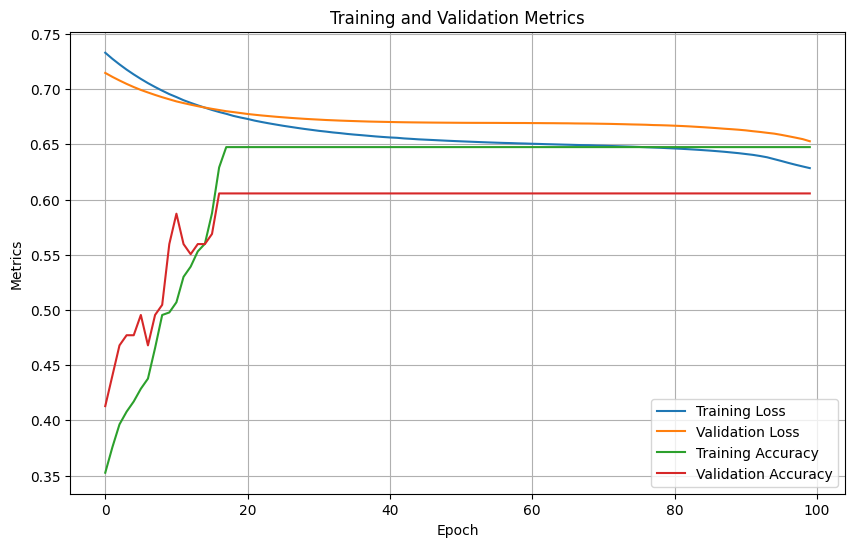

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74        80
         1.0       0.00      0.00      0.00        56

    accuracy                           0.59       136
   macro avg       0.29      0.50      0.37       136
weighted avg       0.35      0.59      0.44       136



c:\Users\NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

                                                     LSTM

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, BatchNormalization
from tensorflow.keras.models import Sequential
model2 = Sequential([
    LSTM(units=256, input_shape=(21, 20), return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(units=128, return_sequences=False),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

sart_time = time.time()
history = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

end_time = time.time()


loss, accuracy = model2.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

c:\Users\NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.6859 - loss: 0.6695 - val_accuracy: 0.7339 - val_loss: 0.5747
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8565 - loss: 0.3195 - val_accuracy: 0.7248 - val_loss: 0.5034
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9055 - loss: 0.2202 - val_accuracy: 0.7248 - val_loss: 0.4692
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9267 - loss: 0.1831 - val_accuracy: 0.7339 - val_loss: 0.4406
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9523 - loss: 0.1214 - val_accuracy: 0.7064 - val_loss: 0.4152
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9517 - loss: 0.1189 - val_accuracy: 0.8349 - val_loss: 0.3088
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9446 - loss: 0.1406 - val_accuracy: 0.7339 - val_loss: 0.4601
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9504 - loss: 0.1300 - val_accuracy: 0.

In [ ]:
with open("mon_modele_lstm.pkl", "wb") as f:
    pickle.dump(model2, f)

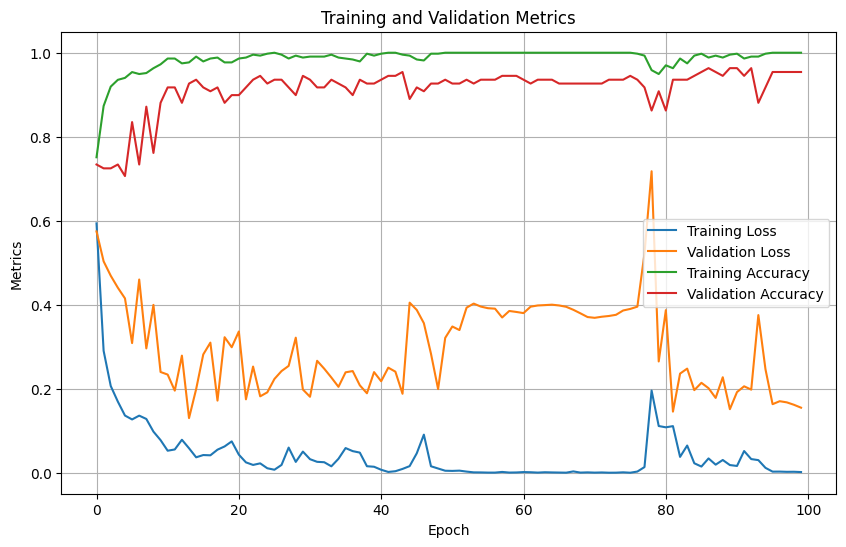

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred_proba = model2.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        80
         1.0       0.95      0.96      0.96        56

    accuracy                           0.96       136
   macro avg       0.96      0.96      0.96       136
weighted avg       0.96      0.96      0.96       136



In [ ]:
model2.save('model/lstm.h5')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


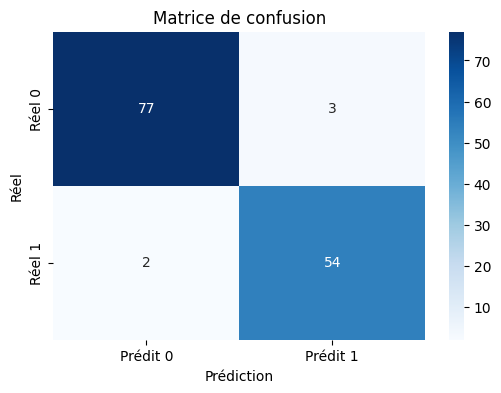

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        80
         1.0       0.95      0.96      0.96        56

    accuracy                           0.96       136
   macro avg       0.96      0.96      0.96       136
weighted avg       0.96      0.96      0.96       136



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Prédire les probabilités
y_pred_proba = model2.predict(X_test)

# 2. Convertir en classes (seuil = 0.5)
y_pred = (y_pred_proba > 0.5).astype(int)

# 3. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# 4. Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Prédit 0", "Prédit 1"], yticklabels=["Réel 0", "Réel 1"])
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

# 5. Rapport de classification
print(classification_report(y_test, y_pred))


In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
import tensorflow as tf

# Ta couche personnalisée (inchangée)
class ScaledActivatedDense(Layer):
    def __init__(self, units, activation='relu', name_prefix="", **kwargs):
        super(ScaledActivatedDense, self).__init__(**kwargs)
        self.units = units
        self.activation_fn = tf.keras.activations.get(activation)
        self.name_prefix = name_prefix

    def build(self, input_shape):
        self.dense = Dense(self.units, activation=None, use_bias=True)
        self.a = self.add_weight(
            name=f"{self.name_prefix}_scales",
            shape=(self.units,),
            initializer="ones",
            trainable=True
        )

    def call(self, inputs):
        x = self.dense(inputs)
        x = self.activation_fn(x)
        return self.a * x


In [ ]:

timesteps = 21
features_per_step = 20
input_layer = Input(shape=(timesteps, features_per_step), name="input")

# Étape 1 : réduire par moyenne globale les 3 pas de temps
x = GlobalAveragePooling1D()(input_layer)  # devient (batch_size, features_per_step)

# Étape 2 : MLP profond
x = BatchNormalization()(x)
x = ScaledActivatedDense(256, activation='relu', name_prefix="dense1")(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = ScaledActivatedDense(128, activation='relu', name_prefix="dense2")(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = ScaledActivatedDense(16, activation='relu', name_prefix="dense3")(x)

output = Dense(1, activation='sigmoid', name="output")(x)

# Création du modèle
model3 = Model(inputs=input_layer, outputs=output)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()   

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 21, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 20)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scaled_activated_dense_6        │ (None, 256)            │         5,632 │
│ (ScaledActivatedDense)          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scaled_activated_dense_7        │ (None, 128)            │        33,024 │
│ (ScaledActivatedDense)          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ scaled_activated_dense_8        │ (None, 16)             │         2,080 │
│ (ScaledActivatedDense)          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,369 (165.50 KB)

 Trainable params: 41,561 (162.35 KB)

 Non-trainable params: 808 (3.16 KB)

In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

sart_time = time.time()
history = model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

end_time = time.time()


loss, accuracy = model3.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5386 - loss: 0.7618 - val_accuracy: 0.7248 - val_loss: 0.6327
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7151 - loss: 0.5450 - val_accuracy: 0.7523 - val_loss: 0.5871
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7946 - loss: 0.4326 - val_accuracy: 0.7706 - val_loss: 0.5531
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7846 - loss: 0.4174 - val_accuracy: 0.7798 - val_loss: 0.5219
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8615 - loss: 0.3408 - val_accuracy: 0.7798 - val_loss: 0.4944
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8696 - loss: 0.3078 - val_accuracy: 0.7890 - val_loss: 0.4691
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8633 - loss: 0.3114 - val_accuracy: 0.7706 - val_loss: 0.4452
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8430 - loss: 0.3277 - val_accuracy: 0.7982

In [ ]:
y_pred_proba = model3.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        80
         1.0       0.93      0.89      0.91        56

    accuracy                           0.93       136
   macro avg       0.93      0.92      0.92       136
weighted avg       0.93      0.93      0.93       136



In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, BatchNormalization
from tensorflow.keras.models import Sequential
model4 = Sequential([
    LSTM(units=64, input_shape=(21, 20), return_sequences=True),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(units=32, return_sequences=False),
    Dropout(0.4),
    BatchNormalization(),
    Dense(units=1, activation='sigmoid')
])
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

sart_time = time.time()
history = model4.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

end_time = time.time()


loss, accuracy = model4.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

Epoch 1/100


c:\Users\NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5887 - loss: 0.7503 - val_accuracy: 0.7431 - val_loss: 0.6152
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7262 - loss: 0.5604 - val_accuracy: 0.7982 - val_loss: 0.5628
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7688 - loss: 0.4818 - val_accuracy: 0.8165 - val_loss: 0.5224
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8296 - loss: 0.3708 - val_accuracy: 0.8349 - val_loss: 0.4808
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8701 - loss: 0.3373 - val_accuracy: 0.8349 - val_loss: 0.4398
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8780 - loss: 0.3058 - val_accuracy: 0.8349 - val_loss: 0.4042
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8935 - loss: 0.2522 - val_accuracy: 0.8349 - val_loss: 0.3825
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9332 - loss: 0.1930 - val_accuracy: 0.7798 - val_l

In [ ]:
y_pred_proba = model4.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)
print(classification_report(y_test, y_pred_classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95        80
         1.0       0.96      0.88      0.92        56

    accuracy                           0.93       136
   macro avg       0.94      0.93      0.93       136
weighted avg       0.94      0.93      0.93       136



In [ ]:
def prediction(mission, point=42):

    scaler = StandardScaler()
    mission_std = scaler.fit_transform(mission)
    mission_std = pd.DataFrame(mission_std, columns=mission.columns)

    # data = mission
    data = mission_std
    # data = mission

    sequence_length = 21
    sequences = []
    for i in range(0, len(data) - sequence_length ):
        sequence = data.iloc[i:i + sequence_length].values
        sequences.append(sequence)

    X = np.array(sequences)

    print(X.shape)
    
    sart_time = time.time()
    result = model4.predict(X)
    end_time = time.time()
    print("Prediction result: ", (result[0:point] > 0.5).astype(int))
    # print("Prediction result: ", result)
    print("prediction time : ",end_time-sart_time)

In [277]:
mission=pd.read_csv('data_1.csv')

In [ ]:
mission.head()
mission=mission.drop(columns=['target_x','target_y','target_z','snow','erreur_m'])
mission=mission.drop(columns=['erreur_cumulee_m'])

In [284]:
mission.head()

,mission_id,time,real_x,real_y,real_z,vx,vy,vz,ax,ay,...,roll,pitch,yaw,wind_x,wind_y,wind_z,velocity,erreur_cumulee_m,rain,fog
0,1,1.747763e+09,-5.322849,20.121300,-4.681305,0.146957,0.058428,-0.930728,-0.126290,-0.045302,...,-0.011934,0.063409,3.079759,3.288905,1.923892,0.483105,7.75,0.469587,0.1,0.161
1,1,1.747763e+09,-3.415282,19.262053,-5.010147,1.308672,-0.613782,0.126232,-0.000650,-0.063845,...,-0.153151,0.002546,3.046363,3.262221,1.901310,0.483924,7.75,0.960742,0.1,0.161
2,1,1.747763e+09,-1.300347,18.288923,-4.831299,1.228576,-0.608501,-0.134659,-0.020005,-0.065327,...,-0.168105,0.006722,3.047047,2.739674,1.764661,0.585473,7.75,1.410347,0.1,0.161
3,1,1.747763e+09,0.678866,17.358110,-4.903763,1.034096,-0.600811,-0.126933,-0.034339,-0.075271,...,-0.156063,0.013958,3.044710,2.750039,1.717058,0.578005,7.75,1.900889,0.1,0.161
4,1,1.747763e+09,2.601047,16.288015,-4.986862,1.022423,-0.582005,-0.028273,-0.026774,-0.081873,...,-0.138653,0.001740,3.044778,3.074431,1.838480,0.544886,7.75,2.393117,0.1,0.161


In [285]:
mission=mission.drop(columns=['erreur_cumulee_m'])

In [288]:
prediction(mission,42)

(22, 21, 20)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Prediction result:  [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]
prediction time :  0.4590342044830322
